In [1]:
# Check vertical profiles at specified location
import xarray as xr
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import gsw
import Functions as fun
import os, sys

In [2]:
path1 = '/Volumes/T7 Shield/MITgcm_jorgemontt/Qsg150_Wind1_S/' # Single wind event with sill
taum1 = np.array([0, 0.1, 0.3, -0.1, -0.3, 0.9, 1.5, -0.9 -1.5])

xid = 1 # Near glacier section
depth, time, pt0s, s0s, u0s, Nsq0s = fun.zprofile(path1,1,xid) # No-wind case
depth, time, pt1s, s1s, u1s, Nsq1s = fun.zprofile(path1,2,xid) # Down-fjord wind
depth, time, pt2s, s2s, u2s, Nsq2s = fun.zprofile(path1,4,xid) # Up-fjord wind

In [ ]:
time[:13]/86400, depth

Text(2, -390, '(d)')

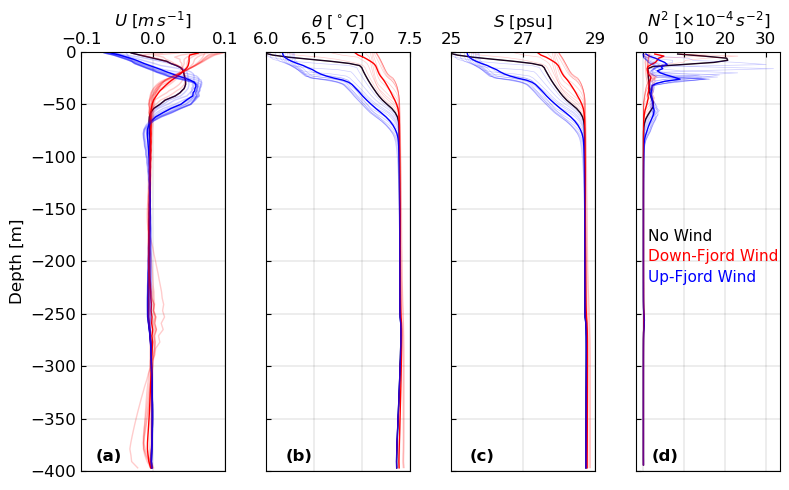

In [16]:
#%matplotlib widget
fig0, (ax1, ax2, ax3, ax4) = plt.subplots(1,4,sharey=True,tight_layout=True,figsize=(8,5))

t0 = 13 # Day 63 when wind stops

# Along-fjord velocity
ax1.plot(u0s[:t0,:].mean(0),depth,'k-',lw=1,label='No Wind') # No-wind
ax1.plot(u1s[:t0,:].mean(0),depth,'r-', lw=1,label='Down-fjord Wind') # down-fjord wind
ax1.plot(u2s[:t0,:].mean(0),depth,'b-', lw=1,label='Up-fjord Wind') # up-fjord wind
for i in range(t0):
    ax1.plot(u1s[i,:],depth,'r-',lw=1,alpha=.2)
    ax1.plot(u2s[i,:],depth,'b-',lw=1,alpha=.2)

ax1.set_ylim([-400, 0])
ax1.set_ylabel(r'Depth [m]',fontsize=12)
ax1.set_xlim([-.1, .1])
ax1.set_xticks([-0.1,0,0.1])
ax1.set_xlabel(r'$U$ [$m\,s^{-1}$]',fontsize=12)
ax1.xaxis.set_label_position('top') # this moves the label to the top
ax1.xaxis.set_ticks_position('top') # this moves the ticks to the 
ax1.tick_params(direction='in', labelsize=12)
ax1.grid(ls='-', c='k', alpha=.5, lw=0.2)

# Potential temperature
ax2.plot(pt0s[:t0,:].mean(0),depth,'k-',lw=1,label='No Wind') # No-wind
ax2.plot(pt1s[:t0,:].mean(0),depth,'r-', lw=1,label='Down-Fjord Wind') # down-fjord wind
ax2.plot(pt2s[:t0,:].mean(0),depth,'b-', lw=1,label='Up-Fjord Wind') # up-fjord wind
for i in range(t0):
    ax2.plot(pt1s[i,:],depth,'r-',lw=.5,alpha=.2)
    ax2.plot(pt2s[i,:],depth,'b-',lw=.5,alpha=.2)

ax2.set_xlim([6, 7.5])
ax2.set_xticks([6, 6.5, 7, 7.5])
ax2.set_xlabel(r'$\theta$ [$^\circ C$]',fontsize=12)
ax2.xaxis.set_label_position('top') # this moves the label to the top
ax2.xaxis.set_ticks_position('top') # this moves the ticks to the 
ax2.tick_params(direction='in', labelsize=12)
ax2.grid(ls='-', c='k', alpha=.5, lw=0.2)

# Salinity
ax3.plot(s0s[:t0,:].mean(0),depth,'k-',lw=1,label='No Wind') # No-wind
ax3.plot(s1s[:t0,:].mean(0),depth,'r-', lw=1,label='Down-fjord Wind') # down-fjord wind
ax3.plot(s2s[:t0,:].mean(0),depth,'b-', lw=1,label='Up-fjord Wind') # up-fjord wind
for i in range(t0):
    ax3.plot(s1s[i,:],depth,'r-',lw=.5,alpha=.2)
    ax3.plot(s2s[i,:],depth,'b-',lw=.5,alpha=.2)

ax3.set_xlim([25, 29])
ax3.set_xticks([25,27,29])
ax3.set_xlabel(r'$S$ [psu]',fontsize=12)
ax3.xaxis.set_label_position('top') # this moves the label to the top
ax3.xaxis.set_ticks_position('top') # this moves the ticks to the 
ax3.tick_params(direction='in', labelsize=12)
ax3.grid(ls='-', c='k', alpha=.5, lw=0.2)

# Stratification
depthN = (depth[1:]+depth[:-1])/2
ax4.plot(Nsq0s[:t0,:].mean(0)*1e4,depthN,'k-',lw=1,label='No Wind') # No-wind
ax4.plot(Nsq1s[:t0,:].mean(0)*1e4,depthN,'r-', lw=1,label='Down-fjord Wind') # down-fjord wind
ax4.plot(Nsq2s[:t0,:].mean(0)*1e4,depthN,'b-', lw=1,label='Up-fjord Wind') # up-fjord wind
for i in range(t0):
    ax4.plot(Nsq1s[i,:]*1e4,depthN,'r-',lw=.5,alpha=.2)
    ax4.plot(Nsq2s[i,:]*1e4,depthN,'b-',lw=.5,alpha=.2)

#ax4.set_xlim([0, 0.003])
ax4.set_xticks([0, 10, 20, 30])
#ax4.set_xticklabels(['0', '0.001', '0.002', '0.003'])
#ax4.legend(loc='center right',fontsize=8)
ax4.text(1,-180,'No Wind',color='k',fontsize=11)
ax4.text(1,-200,'Down-Fjord Wind',color='r',fontsize=11)
ax4.text(1,-220,'Up-Fjord Wind',color='b',fontsize=11)

ax4.set_xlabel(r'$N^2$ [$\times10^{-4}\,s^{-2}$]',fontsize=12)
ax4.xaxis.set_label_position('top') # this moves the label to the top
ax4.xaxis.set_ticks_position('top') # this moves the ticks to the 
ax4.tick_params(direction='in', labelsize=12)
ax4.grid(ls='-', c='k', alpha=.5, lw=0.2)

ax1.text(-0.08,-390,'(a)',fontweight='bold',fontsize=12)
ax2.text(6.2,-390,'(b)',fontweight='bold',fontsize=12)
ax3.text(25.5,-390,'(c)',fontweight='bold',fontsize=12)
ax4.text(2,-390,'(d)',fontweight='bold',fontsize=12)

In [17]:
figpath = '/Users/weiyangbao/Documents/Figures/FjordModeling/JorgeMontt/section_evolution/'
fig0.savefig(figpath+'Glacier_Zprofiles_Tau01.png', dpi=300, bbox_inches='tight')

In [ ]:
# No-Sill Cases
path2 = '/Volumes/T7 Shield/MITgcm_jorgemontt/Qsg150_Wind1_NS/' # Single wind event without sill
taum2 = np.array([0, 0.1, 0.3, -0.1, -0.3, 0.9, 1.5, -0.9 -1.5])

depth, time, pt0, s0, u0, Nsq0 = fun.zprofile(path2,1,xid) # No-wind case
depth, time, pt1, s1, u1, Nsq1 = fun.zprofile(path2,3,xid) # Tau=0.3 down-fjord wind
depth, time, pt2, s2, u2, Nsq2 = fun.zprofile(path2,5,xid) # Tau=-0.3 up-fjord wind

In [ ]:
fig0s, (ax1, ax2, ax3, ax4) = plt.subplots(1,4,sharey=True,tight_layout=True,figsize=(8,5))

t0 = 13 # Day 63 when wind stops

# Along-fjord velocity
ax1.plot(u0[:t0,:].mean(0),depth,'k-',lw=1,label='No Wind') # No-wind
ax1.plot(u1[:t0,:].mean(0),depth,'r-', lw=1,label='Down-fjord Wind') # down-fjord wind
ax1.plot(u2[:t0,:].mean(0),depth,'b-', lw=1,label='Up-fjord Wind') # up-fjord wind
for i in range(t0):
    ax1.plot(u1[i,:],depth,'r-',lw=1,alpha=.2)
    ax1.plot(u2[i,:],depth,'b-',lw=1,alpha=.2)

ax1.set_ylim([-400, 0])
ax1.set_ylabel(r'Depth [$m$]',fontsize=12)
ax1.set_xticks([-0.1,0,0.1])
ax1.set_xlabel(r'$u$ [$m\,s^{-1}$]',fontsize=12)
ax1.xaxis.set_label_position('top') # this moves the label to the top
ax1.xaxis.set_ticks_position('top') # this moves the ticks to the 
ax1.tick_params(direction='in', labelsize=12)
ax1.grid(linestyle = '-', linewidth = 0.4)

# Potential temperature
ax2.plot(pt0[:t0,:].mean(0),depth,'k-',lw=1,label='No Wind') # No-wind
ax2.plot(pt1[:t0,:].mean(0),depth,'r-', lw=1,label='Down-fjord Wind') # down-fjord wind
ax2.plot(pt2[:t0,:].mean(0),depth,'b-', lw=1,label='Up-fjord Wind') # up-fjord wind
for i in range(t0):
    ax2.plot(pt1[i,:],depth,'r-',lw=1,alpha=.2)
    ax2.plot(pt2[i,:],depth,'b-',lw=1,alpha=.2)

#ax2.set_xlim([5.9, 7.9])
ax2.set_xticks([5, 7, 9])
ax2.set_xlabel(r'$\theta$ [$^\circ C$]',fontsize=12)
ax2.xaxis.set_label_position('top') # this moves the label to the top
ax2.xaxis.set_ticks_position('top') # this moves the ticks to the 
ax2.tick_params(direction='in', labelsize=12)
ax2.grid(linestyle = '-', linewidth = 0.4)

# Salinity
ax3.plot(s0[:t0,:].mean(0),depth,'k-',lw=1,label='No Wind') # No-wind
ax3.plot(s1[:t0,:].mean(0),depth,'r-', lw=1,label='Down-fjord Wind') # down-fjord wind
ax3.plot(s2[:t0,:].mean(0),depth,'b-', lw=1,label='Up-fjord Wind') # up-fjord wind
for i in range(t0):
    ax3.plot(s1[i,:],depth,'r-',lw=1,alpha=.2)
    ax3.plot(s2[i,:],depth,'b-',lw=1,alpha=.2)

#ax3.set_xlim([25, 29])
ax3.set_xticks([24, 28, 32])
ax3.set_xlabel(r'$S$',fontsize=12)
ax3.xaxis.set_label_position('top') # this moves the label to the top
ax3.xaxis.set_ticks_position('top') # this moves the ticks to the 
ax3.tick_params(direction='in', labelsize=12)
ax3.grid(linestyle = '-', linewidth = 0.4)

# Stratification
depthN = (depth[1:]+depth[:-1])/2
ax4.plot(Nsq0[:t0,:].mean(0)*1e4,depthN,'k-',lw=1,label='No Wind') # No-wind
ax4.plot(Nsq1[:t0,:].mean(0)*1e4,depthN,'r-', lw=1,label='Down-fjord Wind') # down-fjord wind
ax4.plot(Nsq2[:t0,:].mean(0)*1e4,depthN,'b-', lw=1,label='Up-fjord Wind') # up-fjord wind
for i in range(t0):
    ax4.plot(Nsq1[i,:]*1e4,depthN,'r-',lw=1,alpha=.2)
    ax4.plot(Nsq2[i,:]*1e4,depthN,'b-',lw=1,alpha=.2)

#ax4.set_xlim([0, 0.003])
ax4.set_xticks([0, 25, 50])
#ax4.set_xticklabels(['0', '0.001', '0.002', '0.003'])
#ax4.legend(loc='center right',fontsize=8)
ax4.text(1,-240,'No Wind',color='k',fontsize=12)
ax4.text(1,-260,'Down-fjord Wind',color='r',fontsize=12)
ax4.text(1,-280,'Up-fjord Wind',color='b',fontsize=12)

ax4.set_xlabel(r'$N^2$ [$\times10^{-4}\,s^{-2}$]',fontsize=12)
ax4.xaxis.set_label_position('top') # this moves the label to the top
ax4.xaxis.set_ticks_position('top') # this moves the ticks to the 
ax4.tick_params(direction='in', labelsize=12)
ax4.grid(linestyle='-', linewidth=0.4)

In [ ]:
#%matplotlib inline
fig1a, (ax1, ax2, ax3, ax4) = plt.subplots(1,4,sharey=True,tight_layout=True,figsize=(8,5))


# Along-fjord velocity
ax1.plot(u0[:t0,:].mean(0),depth,'k-',lw=1,label='NW-NS') # No Wind No Sill
ax1.plot(u0s[:t0,:].mean(0),depth,'k--',lw=1,label='NW-S') # No Wind With Sill
ax1.plot(u1[:t0,:].mean(0),depth,'r-', lw=1,label='DW-NS') # Down Wind No Sill
ax1.plot(u1s[:t0,:].mean(0),depth,'r--', lw=1,label='DW-S') # Down Wind With Sill
ax1.plot(u2[:t0,:].mean(0),depth,'b-', lw=1,label='UW-NS') # Up Wind No Sill
ax1.plot(u2s[:t0,:].mean(0),depth,'b--', lw=1,label='UW-S') # Up Wind With Sill
# for i in range(t0):
#     ax1.plot(u1[i,:],depth,'r-',lw=1,alpha=.2)
#     ax1.plot(u2[i,:],depth,'b-',lw=1,alpha=.2)

ax1.set_ylim([-400, 0])
ax1.set_ylabel(r'Depth [$m$]',fontsize=12)
ax1.set_xticks([-0.1,0,0.1])
ax1.set_xlabel(r'$u$ [$m\,s^{-1}$]',fontsize=12)
ax1.xaxis.set_label_position('top') # this moves the label to the top
ax1.xaxis.set_ticks_position('top') # this moves the ticks to the 
ax1.tick_params(direction='in', labelsize=12)
ax1.grid(linestyle = '-', linewidth = 0.4)

# Potential temperature
ax2.plot(pt0[:t0,:].mean(0),depth,'k-',lw=1,label='NW-NS')
ax2.plot(pt0s[:t0,:].mean(0),depth,'k--', lw=1,label='NW-S') 
ax2.plot(pt1[:t0,:].mean(0),depth,'r-', lw=1,label='DW-NS')
ax2.plot(pt1s[:t0,:].mean(0),depth,'r--',lw=1,label='DW-S')
ax2.plot(pt2[:t0,:].mean(0),depth,'b-', lw=1,label='UW-NS') 
ax2.plot(pt2s[:t0,:].mean(0),depth,'b--', lw=1,label='UW-S')
# for i in range(t0):
#     ax2.plot(pt1[i,:],depth,'r-',lw=1,alpha=.2)
#     ax2.plot(pt2[i,:],depth,'b-',lw=1,alpha=.2)

#ax2.set_xlim([5.9, 7.9])
ax2.set_xticks([5, 7, 9])
ax2.set_xlabel(r'$\theta$ [$^\circ C$]',fontsize=12)
ax2.xaxis.set_label_position('top') # this moves the label to the top
ax2.xaxis.set_ticks_position('top') # this moves the ticks to the 
ax2.tick_params(direction='in', labelsize=12)
ax2.grid(linestyle = '-', linewidth = 0.4)

# Salinity
ax3.plot(s0[:t0,:].mean(0),depth,'k-',lw=1,label='NW-NS')
ax3.plot(s0s[:t0,:].mean(0),depth,'k--', lw=1,label='NW-S')
ax3.plot(s1[:t0,:].mean(0),depth,'r-', lw=1,label='DW-NS')
ax3.plot(s1s[:t0,:].mean(0),depth,'r--', lw=1,label='DW-S')
ax3.plot(s2[:t0,:].mean(0),depth,'b-', lw=1,label='UW-NS') 
ax3.plot(s2s[:t0,:].mean(0),depth,'b--', lw=1,label='UW-S')
# for i in range(t0):
#     ax3.plot(s1[i,:],depth,'r-',lw=1,alpha=.2)
#     ax3.plot(s2[i,:],depth,'b-',lw=1,alpha=.2)

#ax3.set_xlim([25, 29])
ax3.set_xticks([24, 28, 32])
ax3.set_xlabel(r'$S$',fontsize=12)
ax3.xaxis.set_label_position('top') # this moves the label to the top
ax3.xaxis.set_ticks_position('top') # this moves the ticks to the 
ax3.tick_params(direction='in', labelsize=12)
ax3.grid(linestyle = '-', linewidth = 0.4)

# Stratification
depthN = (depth[1:]+depth[:-1])/2
ax4.plot(Nsq0[:t0,:].mean(0)*1e4,depthN,'k-',lw=1,label='NW-NS')
ax4.plot(Nsq0s[:t0,:].mean(0)*1e4,depthN,'k--', lw=1,label='NW-S') 
ax4.plot(Nsq1[:t0,:].mean(0)*1e4,depthN,'r-', lw=1,label='DW-NS')
ax4.plot(Nsq1s[:t0,:].mean(0)*1e4,depthN,'r--', lw=1,label='DW-S')
ax4.plot(Nsq2[:t0,:].mean(0)*1e4,depthN,'b-', lw=1,label='UW-NS') 
ax4.plot(Nsq2s[:t0,:].mean(0)*1e4,depthN,'b--', lw=1,label='UW-S')
# for i in range(t0):
#     ax4.plot(Nsq1[i,:]*1e4,depthN,'r-',lw=1,alpha=.2)
#     ax4.plot(Nsq2[i,:]*1e4,depthN,'b-',lw=1,alpha=.2)

#ax4.set_xlim([0, 0.003])
ax4.set_xticks([0, 15, 30])
#ax4.set_xticklabels(['0', '0.001', '0.002', '0.003'])
ax4.legend(loc='lower right',fontsize=12)
# ax4.text(15,-240,'NW-NS',color='k',fontsize=12)
# ax4.text(15,-260,'NW-S',color='gray',fontsize=12)
# ax4.text(15,-280,'DW-NS',color='r',fontsize=12)
# ax4.text(15,-300,'DW-S',color='orange',fontsize=12)
# ax4.text(15,-320,'UW-NS',color='b',fontsize=12)
# ax4.text(15,-340,'UW-S',color='c',fontsize=12)

ax4.set_xlabel(r'$N^2$ [$\times10^{-4}\,s^{-2}$]',fontsize=12)
ax4.xaxis.set_label_position('top') # this moves the label to the top
ax4.xaxis.set_ticks_position('top') # this moves the ticks to the 
ax4.tick_params(direction='in', labelsize=12)
ax4.grid(linestyle='-', linewidth=0.4)